In [25]:
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np 
import os
import matplotlib.colors as mcl
import random
import matplotlib.pyplot as plt

In [26]:
def get_dimension():
    while True:
        dimension=int(input('Enter 2 for 2 Dimension and 3 for 3 Dimensions: '))
        if dimension==2 or dimension==3: 
            break 
        else: 
            print('Creator\'s note Please give 2 or 3 as input as it works on these 2 only (for now) \n')

    return dimension

def get_topics(dimension):
    topics=[]
    if dimension==2:
        topics=['Math','Science']
    else: 
        topics=['Math','Science','Literature']
    
    return topics

def get_students(number_of_students):
    students=[]
    for i in range(0,number_of_students):
        students.append(input(f'Enter name of the {i+1} student:  '))
    return students

def get_column_names(topics):
    columns=['Student']
    for i in topics: 
        columns.append(i)
    return columns

def get_initial_data_frame(students,columns):
    df=pd.DataFrame(columns=columns)
    df['Student']=students
    for i in columns[1:]: 
        df[i]=[random.randrange(30,100) for number in range(len(students))]
    return df


def get_data_frame(number_of_students,dimension):
    topics=get_topics(dimension)
    students=get_students(number_of_students)
    columns=get_column_names(topics)
    data_df=get_initial_data_frame(students,columns)
    return data_df
    

def saving_dataframe_and_loading_latest_dataframe(data_df):
        
    if len(data_df.columns)==3:
        print('Saving to \'Dataset 2D\'')
        if 'Dataset_2D.csv' in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=False)
        else: 
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_2D.csv')

    else: 
        print('Saving to \'Dataset 2D\'')
        if "Dataset_3D.csv" in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=False)
        else:
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_3D.csv')
    
    return data_df

In [29]:
dimension=get_dimension()
number_of_students=int(input('Enter number of students to work with: '))

data_df=get_data_frame(number_of_students,dimension)
data_df=saving_dataframe_and_loading_latest_dataframe(data_df)

print('Numpy array: ')
data_np=(data_df.drop(columns=['Student'])).to_numpy()
print(data_np)
print('Data Frame: ')
data_df

Saving to 'Dataset 2D'
Numpy array: 
[[40 52 74]
 [36 49 80]
 [45 37 33]
 [43 31 42]
 [33 85 35]
 [94 70 32]
 [46 95 70]
 [67 79 98]
 [82 34 43]
 [40 46 89]
 [57 76 38]
 [30 62 50]
 [77 77 58]
 [95 95 62]
 [42 34 46]
 [35 77 45]
 [94 41 88]
 [31 32 96]
 [38 35 73]
 [41 65 37]]
Data Frame: 


,Student,Math,Science,Literature
0,NaN,40,52,74
1,Aadim,36,49,80
2,Aashish,45,37,33
3,Kiran,43,31,42
4,Rajip,33,85,35
5,Aadim,94,70,32
6,Prajapati,46,95,70
7,Aashish,67,79,98
8,Chakradhar,82,34,43
9,Kiran,40,46,89


In [30]:
clustering_model=KMeans(n_clusters=5).fit(data_np)
cluster_op=clustering_model.predict(data_np)
data_df['Clusters']=cluster_op
data_df.to_csv('output.csv',index=False)

In [31]:
def plot_all(topics,data_df,color_list,flag):
    if flag==3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    
    for i in range(data_df.shape[0]):
        c=data_df.at[i,'Clusters']
        x_pt=data_df.at[i,topics[0]]
        y_pt=data_df.at[i,topics[1]]
        if flag==3:
            z_pt=data_df.at[i,topics[2]]
            ax.scatter(x_pt,y_pt,z_pt,color=color_list[c])
        else: 
            plt.scatter(x=x_pt,y=y_pt,color=color_list[c])
    

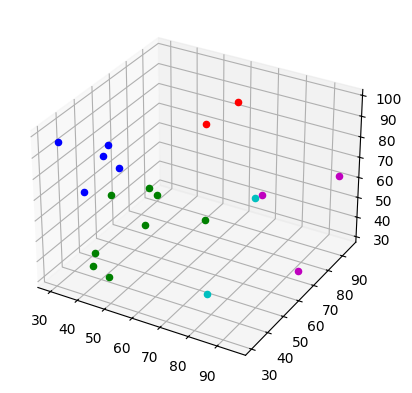

In [32]:
topics=get_topics(len(data_df.columns)-2)
color_list=list(mcl.BASE_COLORS.values())


if len(topics)==3:
    plot_all(topics,data_df,color_list,3)
else: 
    plot_all(topics,data_df,color_list,2)

7646.374999999999
[28569.949999999997, 20038.833333333332, 14874.632142857141, 10606.958333333334, 7515.633333333334, 5838.550000000001, 4378.083333333333, 4020.333333333333, 2884.25, 1757.5833333333335, 1395.8333333333333]


Text(0, 0.5, 'WCSS')

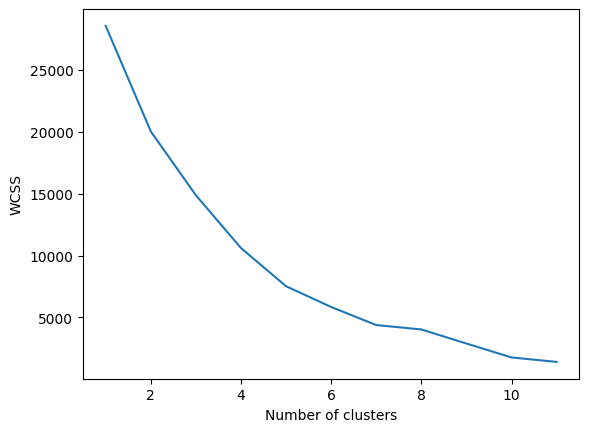

In [33]:
print(clustering_model.inertia_)
wcss=[(KMeans(i).fit(data_np)).inertia_ for i in range(1,12)]
print(wcss)
n_cluster=[i for i in range(1,12)]

plt.plot(n_cluster,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [35]:
def get_similar_students():    
    try:
        df=pd.read_csv('output.csv')
    except: 
        path=input('Enter path for the csv with cluster assigned: ')
        df=pd.read_csv(path)
    name_student=input('\nEnter name of the student: ')
    try: 
        cluster_assigned=df['Clusters'].loc[df['Student'].str.contains(name_student)].values[0]
        list_of_students=df['Student'].loc[df['Clusters']==cluster_assigned].to_list()
        df_similar=df.loc[df['Clusters']==cluster_assigned]
        del cluster_assigned
    except:
        list_of_students=('Student not found').split(' ')
        df_similar=pd.DataFrame()
        
    
    return list_of_students,df_similar

In [36]:
similar_students_list,similar_students_table=get_similar_students()
print('\n\nSimilar Studnents are: '+','.join(similar_students_list))
print('\nTable of similar students: ')
similar_students_table



Similar Studnents are: Student,not,found

Table of similar students: 


""
